In [146]:
articles = []

In [147]:
import os
import pandas as pd

# Eğitim veri setinin yolu
for j in range (1,11):
    if j!=10:
        training_dataset_path = 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem0000' + str(j)

        # Tüm problem klasörlerini listeleme
        problems = [os.path.join(training_dataset_path, d) for d in os.listdir(training_dataset_path) if os.path.isdir(os.path.join(training_dataset_path, d))]
        print("Problem Klasörleri:", problems)  # İlk 5 klasörü göster

        # İlk problem klasöründen dosyaları okuma
        for i in range(0,len(problems)):
            problem_path = problems[i]
            files = os.listdir(problem_path)
            print("Problemdeki Dosyalar:", files)
            # Makale içeriği ve yazar bilgisini okuma
            for file_name in files:
                file_path = os.path.join(problem_path, file_name)
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                author = problem_path.split(os.sep)[-1]  # Dosya adından yazarı alıyoruz
                articles.append({"file_name": file_name, "content": content, "author": author})
    else:
        training_dataset_path = 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00010'

        # Tüm problem klasörlerini listeleme
        problems = [os.path.join(training_dataset_path, d) for d in os.listdir(training_dataset_path) if os.path.isdir(os.path.join(training_dataset_path, d))]
        print("Problem Klasörleri:", problems)  # İlk 5 klasörü göster

        # İlk problem klasöründen dosyaları okuma
        for i in range(0,len(problems)):
            problem_path = problems[i]
            files = os.listdir(problem_path)
            print("Problemdeki Dosyalar:", files)
            # Makale içeriği ve yazar bilgisini okuma
            for file_name in files:
                file_path = os.path.join(problem_path, file_name)
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                author = problem_path.split(os.sep)[-1]  # Dosya adından yazarı alıyoruz
                articles.append({"file_name": file_name, "content": content, "author": author})


    

Problem Klasörleri: ['pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00001', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00002', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00003', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00004', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00005', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00006', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00007', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00008', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00009', 'pan18-cross-domain-authorship-attribution-training-dataset-2

In [148]:
# DataFrame ile organize etme
df = pd.DataFrame(articles)
print(df.head())

        file_name                                            content  \
0  known00001.txt  graceful ones.\n\n"One more," Marvelous said, ...   
1  known00002.txt  before. If he can, he’ll remember a classmate ...   
2  known00003.txt  she thought - he was in Team Baron only becaus...   
3  known00004.txt  Zawame City’s no longer ‘home’ as it once was....   
4  known00005.txt  1. He showered her with smiles the first time ...   

           author  
0  candidate00001  
1  candidate00001  
2  candidate00001  
3  candidate00001  
4  candidate00001  


In [149]:
df.describe().T

,count,unique,top,freq
file_name,1496,124,known00001.txt,125
content,1496,1151,"graceful ones.\n\n""One more,"" Marvelous said, ...",2
author,1496,21,unknown,621


In [150]:
df.head()

,file_name,content,author
0,known00001.txt,"graceful ones.\n\n""One more,"" Marvelous said, ...",candidate00001
1,known00002.txt,"before. If he can, he’ll remember a classmate ...",candidate00001
2,known00003.txt,she thought - he was in Team Baron only becaus...,candidate00001
3,known00004.txt,Zawame City’s no longer ‘home’ as it once was....,candidate00001
4,known00005.txt,1. He showered her with smiles the first time ...,candidate00001


In [140]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk veri setlerini indirme
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Veri temizleme işlemleri
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Küçük harfe çevirme
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Sadece alfanümerik kelimeleri al
    tokens = [word for word in tokens if word not in stop_words]  # Stopword'leri kaldır
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Temizlenmiş metinleri oluşturma
df['cleaned_content'] = df['content'].apply(preprocess_text)
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


KeyError: 'content'

In [90]:
df.head()

,file_name,content,author
0,known00001.txt,"graceful ones.\n\n""One more,"" Marvelous said, ...",candidate00001
1,known00002.txt,"before. If he can, he’ll remember a classmate ...",candidate00001
2,known00003.txt,she thought - he was in Team Baron only becaus...,candidate00001
3,known00004.txt,Zawame City’s no longer ‘home’ as it once was....,candidate00001
4,known00005.txt,1. He showered her with smiles the first time ...,candidate00001


In [46]:
df.head

<bound method NDFrame.head of             file_name                                            content  \
0   ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
1   problem-info.json  {\n    "unknown-folder": "unknown",\n    "cand...   
2   ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
3   problem-info.json  {\n    "unknown-folder": "unknown",\n    "cand...   
4   ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
5   problem-info.json  {\n    "unknown-folder": "unknown",\n    "cand...   
6   ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
7   problem-info.json  {\n    "unknown-folder": "unknown",\n    "cand...   
8   ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
9   problem-info.json  {\n    "unknown-folder": "unknown",\n    "cand...   
10  ground-truth.json  {\n    "ground_truth": [\n        {\n         ...   
11  problem-info.json  {\n    "unknown-folder": "unknown",

In [1]:
import os
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# NLTK stopwords indirme
nltk.download('stopwords')
nltk.download('punkt')

# Metin temizleme fonksiyonu
def clean_text(text):
    # Noktalama işaretlerini ve özel karakterleri kaldır
    text = re.sub(r'[^\w\s]', '', text)
    # Sayıları kaldır
    text = re.sub(r'\d+', '', text)
    # Küçük harfe çevir
    text = text.lower()
    # Durak kelimeleri kaldır
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Eğitim veri setinin yolu
articles = []  # Initialize the list to store article data
for j in range(1, 11):
    if j != 10:
        training_dataset_path = 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem0000' + str(j)
    else:
        training_dataset_path = 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00010'

    # Tüm problem klasörlerini listeleme
    problems = [os.path.join(training_dataset_path, d) for d in os.listdir(training_dataset_path) if os.path.isdir(os.path.join(training_dataset_path, d))]
    print(f"Problem Klasörleri: {problems}")  # Tüm klasörleri göster

    # İlk problem klasöründen dosyaları okuma
    for i in range(0, len(problems)):
        problem_path = problems[i]
        files = os.listdir(problem_path)
        print(f"Problemdeki Dosyalar: {files}")

        # Makale içeriği ve yazar bilgisini okuma
        for file_name in files:
            file_path = os.path.join(problem_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
            
            # Temizleme işlemi
            cleaned_content = clean_text(content)
            
            # Yazar bilgisini almak
            author = problem_path.split(os.sep)[-1]  # Dosya yolundan yazar ismini almak
            articles.append({"file_name": file_name, "content": cleaned_content, "author": author})

# Convert the list of articles to a DataFrame
df = pd.DataFrame(articles)

# Print an example of the cleaned text
print(f"Örnek Temizlenmiş Metin: {df['content'][0][:100]}")  # İlk 100 karakteri göster

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Problem Klasörleri: ['pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00001', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00002', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00003', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00004', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00005', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00006', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00007', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00008', 'pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02/problem00001\\candidate00009', 'pan18-cross-domain-authorship-attribution-training-dataset-2

In [2]:
df.describe().T

,count,unique,top,freq
file_name,1496,124,known00001.txt,125
content,1496,1151,graceful ones one marvelous said sounding roya...,2
author,1496,21,unknown,621


In [13]:
from gensim.models import Word2Vec
import numpy as np

# Word2Vec modelini eğitmek için veri hazırlama
# Her bir dokümanı tokenize edip bir liste haline getiriyoruz
tokenized_articles = [content.split() for content in df['content']]

# Word2Vec modelini eğitme
w2v_model = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=2, workers=4, sg=0)  # sg=0 CBOW, sg=1 Skip-Gram
print("Word2Vec Modeli Eğitildi.")

# Örnek kelime vektörlerini inceleme
word = "example"  # Kullanılabilir bir kelime seçin
if word in w2v_model.wv:
    print(f"{word} için vektör: {w2v_model.wv[word]}")

# Her doküman için vektör oluşturma
def document_vector(tokens, model):
    # Sadece Word2Vec modelinde bulunan kelimeleri al
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:  # Eğer kelime vektörleri varsa ortalama al
        return np.mean(vectors, axis=0)
    else:  # Eğer kelime yoksa sıfır vektör dön
        return np.zeros(model.vector_size)

# Her doküman için vektörleri hesaplama
df['doc_vector'] = df['content'].apply(lambda x: document_vector(x.split(), w2v_model))
print("Doküman vektörleri oluşturuldu.")

# İlk doküman vektörünü inceleme
print(f"İlk doküman vektörü: {df['doc_vector'][0]}")


Word2Vec Modeli Eğitildi.
example için vektör: [-0.01077994  0.00302994  0.00793712  0.00476968 -0.01341988 -0.00895221
 -0.02121854  0.0017423  -0.00256011  0.00551833 -0.02336614  0.00532827
  0.01103625  0.00988722 -0.00325779 -0.00065191  0.0013099  -0.0199825
  0.01423478 -0.00326447  0.02965087  0.00709801 -0.01464834  0.02030434
  0.00956019  0.00216236 -0.01777709  0.00384291  0.00168378 -0.00249647
  0.00802423  0.02046254 -0.01924729  0.02661513 -0.01313561 -0.00036861
 -0.01592461 -0.00356054  0.00920936 -0.00770815 -0.00471307 -0.00503983
 -0.02437021 -0.01452216 -0.00413266  0.01888513 -0.02939933 -0.01754115
 -0.00953056  0.00194451 -0.03753168  0.01968654 -0.01289227  0.01812012
  0.00760834  0.00567783  0.00282345 -0.00519218 -0.01226441 -0.00638272
 -0.01791494  0.0158182  -0.00980464 -0.00667914 -0.00405422  0.00044877
 -0.00116959 -0.00674149  0.01229079 -0.01288813 -0.00602619  0.02127058
 -0.00409222 -0.01257443 -0.02857084  0.00550354 -0.02119406  0.01367813
 -0.0

In [14]:
df.head()

,file_name,content,author,doc_vector
0,known00001.txt,graceful ones one marvelous said sounding roya...,candidate00001,"[-0.31590658, -0.110265866, 0.17659137, 0.1054..."
1,known00002.txt,hell remember classmate old school youll never...,candidate00001,"[-0.3347103, -0.10423602, 0.16571131, 0.111917..."
2,known00003.txt,thought team baron reason able stay kaito kumo...,candidate00001,"[-0.33412147, -0.08777324, 0.1570966, 0.104478..."
3,known00004.txt,zawame citys longer home know gospel truth eve...,candidate00001,"[-0.3518064, -0.10401393, 0.17120826, 0.118623..."
4,known00005.txt,showered smiles first time saw never one think...,candidate00001,"[-0.36017472, -0.13935393, 0.20503989, 0.12128..."


In [18]:
import numpy as np

# GloVe vektörlerini yükleme
def load_glove_vectors(file_path):
    glove_vectors = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_vectors[word] = vector
    return glove_vectors

# GloVe vektör dosyasının yolu
glove_file_path = 'glove.6B.100d.txt'  # İndirdiğiniz dosyanın yolu
glove_vectors = load_glove_vectors(glove_file_path)
print("GloVe vektörleri yüklendi.")

# Doküman vektörleri oluşturma
def document_vector_glove(tokens, glove_vectors, vector_size=100):
    vectors = [glove_vectors[word] for word in tokens if word in glove_vectors]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Her doküman için vektör oluşturma
df['doc_vector_glove'] = df['content'].apply(lambda x: document_vector_glove(x.split(), glove_vectors))
print("GloVe ile doküman vektörleri oluşturuldu.")


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [ ]:
df.head()

In [31]:
from transformers import BertTokenizer, BertModel
import torch

# BERT modeli ve tokenizer'ı yükleme
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
print("BERT modeli ve tokenizer yüklendi.")

# Doküman vektörü çıkarma
def document_vector_bert(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    outputs = model(**inputs)
    # [CLS] token'ın çıktısını al (genelde doküman vektörü olarak kullanılır)
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding.flatten()

# İlk 10 doküman için BERT vektörlerini hesaplama
df['doc_vector_bert'] = df['content'].apply(lambda x: document_vector_bert(x, tokenizer, model))
print("BERT ile doküman vektörleri oluşturuldu.")


BERT modeli ve tokenizer yüklendi.



KeyboardInterrupt



In [ ]:
df.head()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Yazar etiketlerini sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
df['author_encoded'] = label_encoder.fit_transform(df['author'])

# Doküman vektörlerini ve etiketleri hazırlama
X = np.array(df['doc_vector_bert'].tolist())  # Doküman vektörleri
y = df['author_encoded']  # Yazar etiketleri

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Eğitim seti boyutu: {X_train.shape}, Test seti boyutu: {X_test.shape}")


Eğitim seti boyutu: (1196, 768), Test seti boyutu: (300, 768)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Model eğitildi.")


Model eğitildi.


In [25]:
# Test seti tahminleri
y_pred = model.predict(X_test)

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")

# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Model Doğruluğu: 0.43
Sınıflandırma Raporu:
                precision    recall  f1-score   support

candidate00001       0.00      0.00      0.00        14
candidate00002       0.00      0.00      0.00        14
candidate00003       0.06      0.07      0.07        14
candidate00004       0.11      0.14      0.12        14
candidate00005       0.09      0.07      0.08        14
candidate00006       0.00      0.00      0.00         7
candidate00007       0.00      0.00      0.00         7
candidate00008       1.00      0.14      0.25         7
candidate00009       0.00      0.00      0.00         7
candidate00010       0.00      0.00      0.00         7
candidate00011       0.00      0.00      0.00         7
candidate00012       0.00      0.00      0.00         7
candidate00013       0.33      0.14      0.20         7
candidate00014       0.00      0.00      0.00         7
candidate00015       0.00      0.00      0.00         7
candidate00016       0.50      0.14      0.22         7
can

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


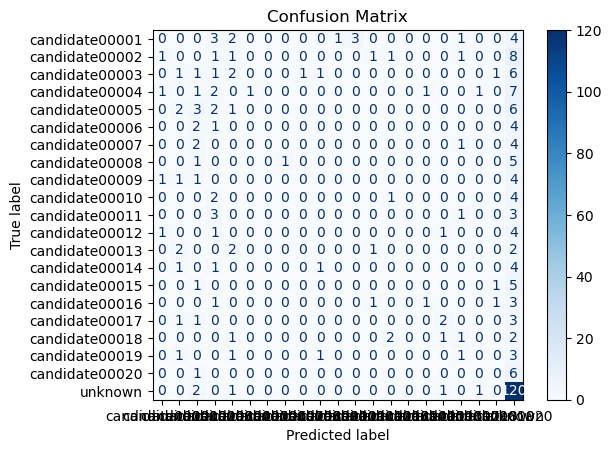

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import os
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import normalize

# BERT modeli ve tokenizer'ı yükleme
def load_bert_model():
    model_name = "bert-base-uncased"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)
    return tokenizer, model

# BERT ile metin embedding'i çıkarma
def get_bert_embedding(text, tokenizer, model, max_length=512):
    # Tokenize etme
    tokens = tokenizer(
        text,
        max_length=max_length,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    # BERT'e input ver
    with torch.no_grad():
        outputs = model(**tokens)
    # CLS token'ının embedding'ini al
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.squeeze().numpy()

# Eğitim veri setini işleme
def process_dataset(base_path, tokenizer, model, num_problems=10):
    articles = []
    for j in range(1, num_problems + 1):
        problem_folder = f"{base_path}/problem{'0000' if j != 10 else '000'}{j}"
        problems = [os.path.join(problem_folder, d) for d in os.listdir(problem_folder) if os.path.isdir(os.path.join(problem_folder, d))]
        
        for problem_path in problems:
            files = os.listdir(problem_path)
            for file_name in files:
                file_path = os.path.join(problem_path, file_name)
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                
                # Metin embedding'i çıkar
                embedding = get_bert_embedding(content, tokenizer, model)
                author = os.path.basename(problem_path)  # Klasör adından yazar ismi
                articles.append({"file_name": file_name, "embedding": embedding, "author": author})
    return pd.DataFrame(articles)

# Ana işlem
base_path = "pan18-cross-domain-authorship-attribution-training-dataset-2017-12-02"
tokenizer, model = load_bert_model()
df = process_dataset(base_path, tokenizer, model)

# Embedding örneğini inceleme
print(f"İlk doküman embedding'i (boyut: {len(df['embedding'][0])}): {df['embedding'][0]}")

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Özellik ve hedef değişkenleri ayırma
X = np.stack(df['embedding'].values)  # Embedding'leri bir numpy array'e dönüştür
y = df['author']  # Yazar etiketleri

# Eğitim ve test seti ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini eğitme
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred = classifier.predict(X_test)

# Accuracy hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Daha detaylı metrikler için sınıflandırma raporu
print(classification_report(y_test, y_pred))

KeyError: 'embedding'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Veri hazırlama
# Doküman vektörlerini matris formatına çevirme
X = np.vstack(df['doc_vector'].values)  # Vektörler matris formatında
y = df['author']  # Hedef değişken (yazarlar)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli eğitme
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4033333333333333

Classification Report:
                 precision    recall  f1-score   support

candidate00001       0.00      0.00      0.00        14
candidate00002       0.00      0.00      0.00         5
candidate00003       0.00      0.00      0.00        11
candidate00004       0.00      0.00      0.00        13
candidate00005       0.00      0.00      0.00        17
candidate00006       0.00      0.00      0.00         4
candidate00007       0.00      0.00      0.00        11
candidate00008       0.00      0.00      0.00         9
candidate00009       0.00      0.00      0.00        13
candidate00010       0.00      0.00      0.00        11
candidate00011       0.00      0.00      0.00         9
candidate00012       0.00      0.00      0.00         8
candidate00013       0.00      0.00      0.00         5
candidate00014       0.00      0.00      0.00         3
candidate00015       0.00      0.00      0.00         4
candidate00016       0.00      0.00      0.00    

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
